import numpy as np
import pandas as pd

In [106]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [107]:
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [108]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_passengerId= test_df["PassengerId"] 

In [109]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
def bar_plot(variable):
    
    var=train_df[variable]
    varValue= var.value_counts()
    
    #visulation
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

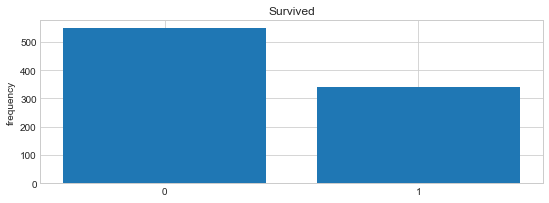

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


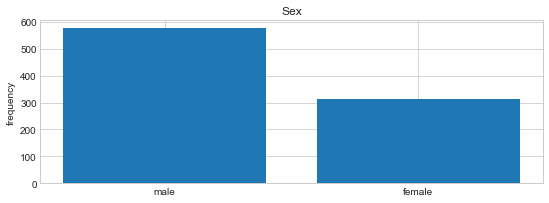

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


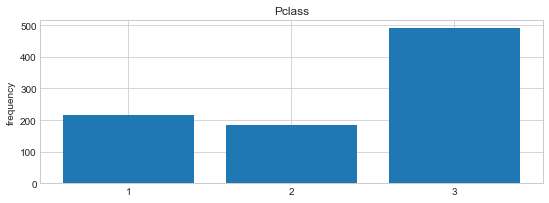

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


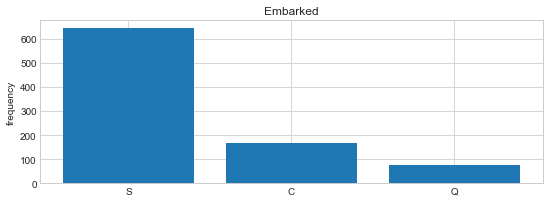

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


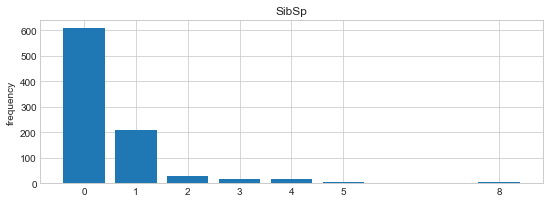

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


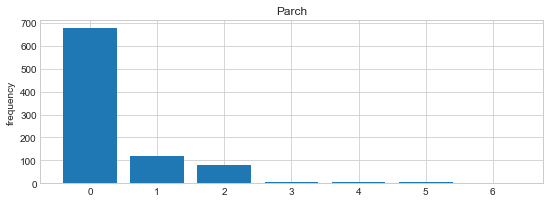

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [114]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [115]:
category2=["Cabin","Name","Ticket"]

for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
D50            1
E38            1
A6             1
C99            1
C7             1
Name: Cabin, Length: 147, dtype: int64 

Sirota, Mr. Maurice                      1
Dean, Master. Bertram Vere               1
Lindahl, Miss. Agda Thorilda Viktoria    1
Moran, Mr. Daniel J                      1
Mannion, Miss. Margareth                 1
                                        ..
Shellard, Mr. Frederick William          1
Bracken, Mr. James H                     1
Radeff, Mr. Alexander                    1
Pasic, Mr. Jakob                         1
Adahl, Mr. Mauritz Nils Martin           1
Name: Name, Length: 891, dtype: int64 

CA. 2343             7
347082               7
1601                 7
347088               6
3101295              6
                    ..
A/5. 10482           1
STON/O 2. 3101269    1
29104                1
2672                 1
240929               1
Name: 

In [116]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

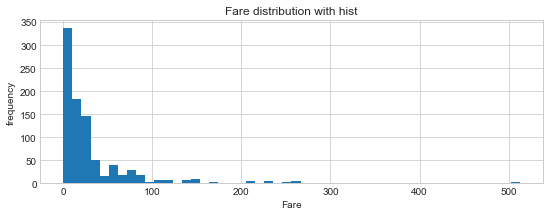

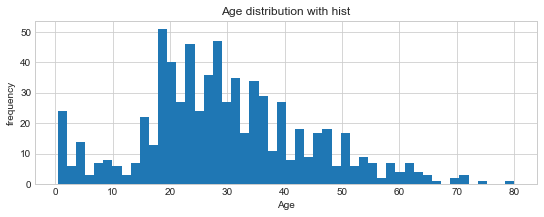

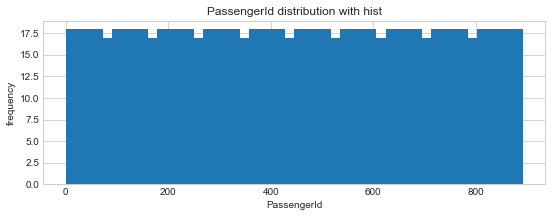

In [117]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

In [118]:
# pclass vs survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending= False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [119]:
# sex vs survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [120]:
# SibSp vs survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [121]:
# Parch vs survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [122]:
# parch vs pclass
train_df[["Parch","Pclass"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Pclass",ascending= False)

,Parch,Pclass
5,5,3.000000
6,6,3.000000
3,3,2.600000
4,4,2.500000
0,0,2.321534
2,2,2.275000
1,1,2.203390


In [123]:
# Sex vs fare
train_df[["Sex","Fare"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Fare",ascending= False)

,Sex,Fare
0,female,44.479818
1,male,25.523893


In [124]:
def detect_outliers(df,features):
    outlier_indices=[]
    for c in features:
        Q1= np.percentile(df[c],25)
        Q3= np.percentile(df[c],25)
        IQR=Q3-Q1
        outlier_step = IQR*1.5
        outlier_list_col = df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
        outlier_indices=Counter(outlier_list_col)
        
        outlier_indices=Counter(outlier_indices)
        multiple_outliers=(i for i,v in outlier_indices.items() if v>2)
        
        return multiple_outliers

In [125]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [126]:
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [127]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [128]:
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [129]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [130]:
train_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [131]:
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


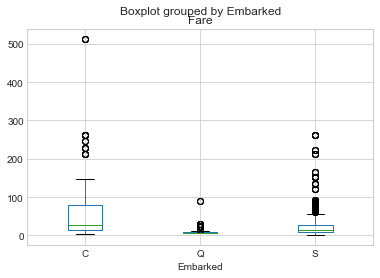

In [132]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [133]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [134]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [135]:
train_df["Fare"]=np.mean(train_df[train_df["Pclass"]==3]["Fare"])

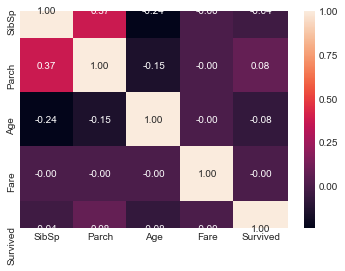

In [136]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot= True, fmt=".2f")
plt.show()

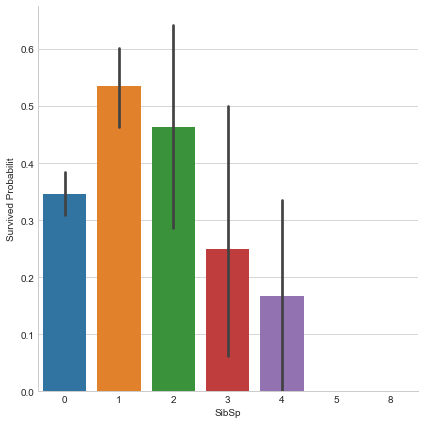

In [137]:
g= sns.factorplot(x="SibSp",y= "Survived", data=train_df, kind="bar",size=6)
g.set_ylabels("Survived Probabilit")
plt.show()

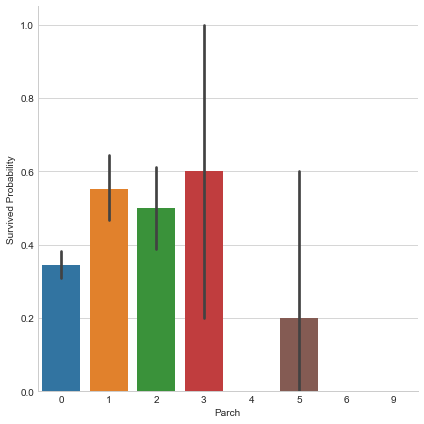

In [190]:
g=sns.factorplot(x="Parch",y="Survived", kind="bar", data=train_df,size=6)
g.set_ylabels("Survived Probability")
plt.show()

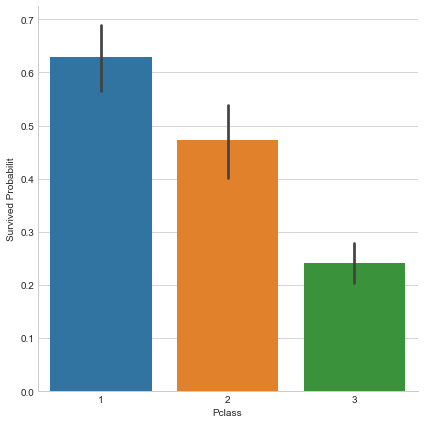

In [139]:
g=sns.factorplot(x="Pclass",y="Survived", kind="bar", data=train_df,size=6)
g.set_ylabels("Survived Probabilit")
plt.show()

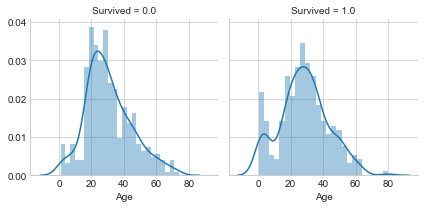

In [140]:
g=sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot,"Age",bins=25)
plt.show()

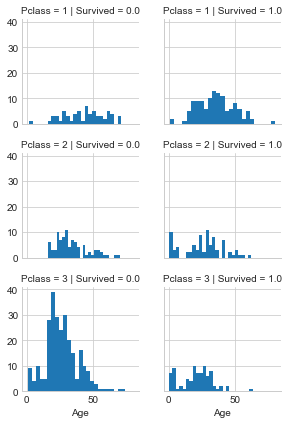

In [141]:
g=sns.FacetGrid(train_df, col="Survived",row="Pclass",size=2)
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show()

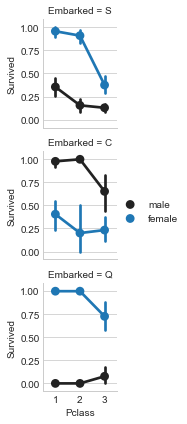

In [142]:
g=sns.FacetGrid(train_df,row="Embarked",size=2)
g.map(sns.pointplot,"Pclass", "Survived","Sex")
g.add_legend()
plt.show()

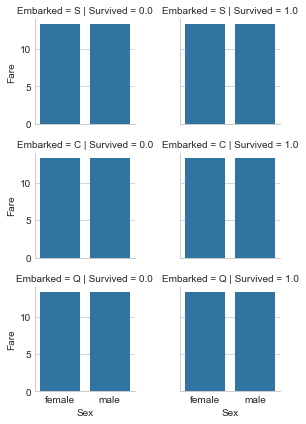

In [143]:
g=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=2)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

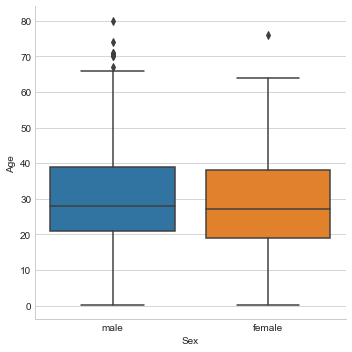

In [144]:
sns.factorplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

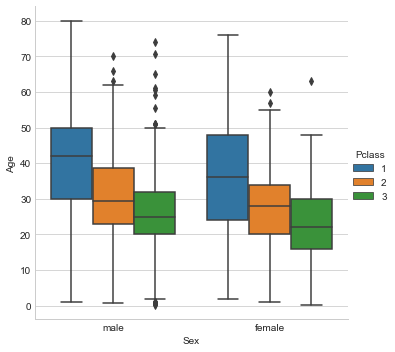

In [145]:
sns.factorplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

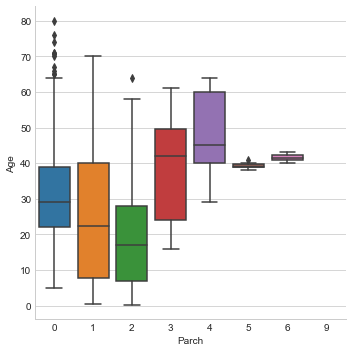

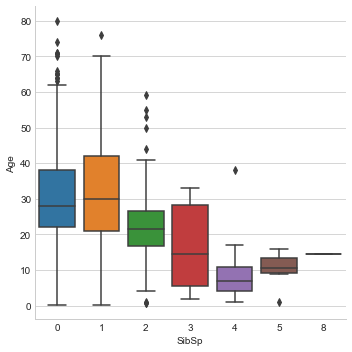

In [146]:
sns.factorplot(x="Parch",y="Age",data=train_df,kind="box")
sns.factorplot(x="SibSp",y="Age",data=train_df,kind="box")

plt.show()

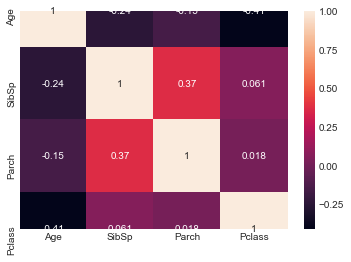

In [147]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

In [148]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [149]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [150]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [151]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [152]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

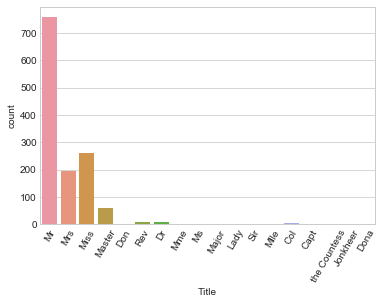

In [153]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [154]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

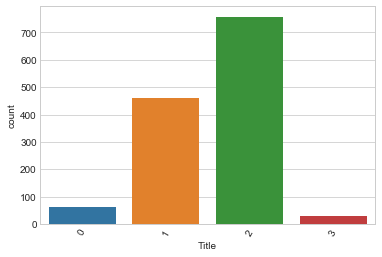

In [155]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

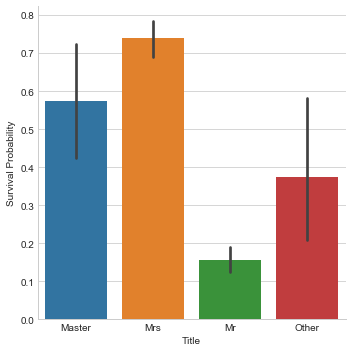

In [156]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [157]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)
train_df.head()


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,2


In [158]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0


In [159]:
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0


In [160]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1 #+1 means passenger

In [161]:
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0,2
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0,2
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,1
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0,2
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0,1


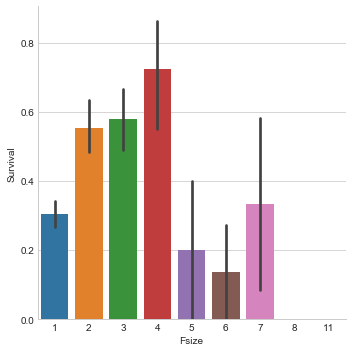

In [162]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [163]:
train_df["family_size"] = [1 if i < 3 else 0 for i in train_df["Fsize"]] #different
train_df.head(10)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0,2,1
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0,2,1
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,1,1
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0,2,1
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0,1,1
5,25.0,NaN,Q,13.302889,0,6,3,male,0,0.0,330877,0,0,1,0,1,1
6,54.0,E46,S,13.302889,0,7,1,male,0,0.0,17463,0,0,1,0,1,1
7,2.0,NaN,S,13.302889,1,8,3,male,3,0.0,349909,1,0,0,0,5,0
8,27.0,NaN,S,13.302889,2,9,3,female,0,1.0,347742,0,1,0,0,3,0
9,14.0,NaN,C,13.302889,0,10,2,female,1,1.0,237736,0,1,0,0,2,1


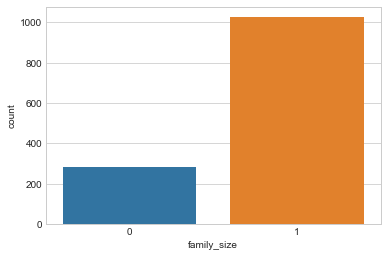

In [164]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

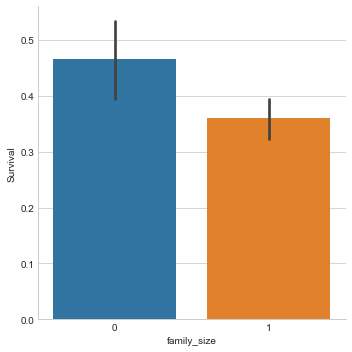

In [165]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [166]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,22.0,NaN,S,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0,2,0,1
1,38.0,C85,C,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0,2,0,1
2,26.0,NaN,S,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1
3,35.0,C123,S,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0,2,0,1
4,35.0,NaN,S,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0,1,0,1


In [167]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

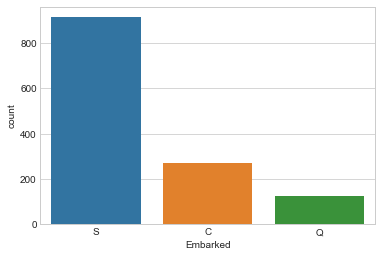

In [168]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [169]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,13.302889,0,1,3,male,1,0.0,A/5 21171,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,13.302889,0,2,1,female,1,1.0,PC 17599,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,13.302889,0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,13.302889,0,4,1,female,1,1.0,113803,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,13.302889,0,5,3,male,0,0.0,373450,0,0,1,0,1,0,1,0,0,1


In [170]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [171]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [172]:
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,13.302889,0,1,3,male,1,0.0,A5,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,13.302889,0,2,1,female,1,1.0,PC,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,13.302889,0,3,3,female,0,1.0,STONO2,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,13.302889,0,4,1,female,1,1.0,x,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,13.302889,0,5,3,male,0,0.0,x,0,0,1,0,1,0,1,0,0,1


In [173]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T") #prefix for better name space
train_df.head(10)

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,22.0,NaN,13.302889,0,1,3,male,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,13.302889,0,2,1,female,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,13.302889,0,3,3,female,0,1.0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,C123,13.302889,0,4,1,female,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,13.302889,0,5,3,male,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
5,25.0,NaN,13.302889,0,6,3,male,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
6,54.0,E46,13.302889,0,7,1,male,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,13.302889,1,8,3,male,3,0.0,1,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,13.302889,2,9,3,female,0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,13.302889,0,10,2,female,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1


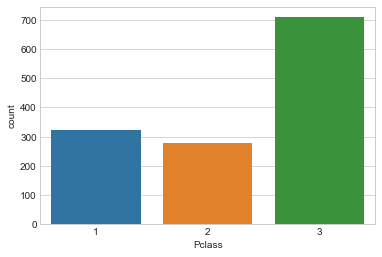

In [174]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [175]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,13.302889,0,1,male,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,13.302889,0,2,female,1,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,NaN,13.302889,0,3,female,0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,35.0,C123,13.302889,0,4,female,1,1.0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,NaN,13.302889,0,5,male,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [176]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Survived,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,NaN,13.302889,0,1,1,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,38.0,C85,13.302889,0,2,1,1.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,26.0,NaN,13.302889,0,3,0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.0,C123,13.302889,0,4,1,1.0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,35.0,NaN,13.302889,0,5,0,0.0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [177]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [178]:
train_df.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Survived', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [179]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [180]:
train_df_len

891

In [181]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [182]:
test.head()

,Age,Fare,Parch,SibSp,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
891,34.5,13.302889,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
892,47.0,13.302889,0,1,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
893,62.0,13.302889,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
894,27.0,13.302889,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
895,22.0,13.302889,1,1,0,1,0,0,3,1,...,0,0,0,0,1,0,0,1,1,0


In [183]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 596
X_test 295
y_train 596
y_test 295
test 418


In [184]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.22
Testing Accuracy: % 84.07


In [185]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [186]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   26.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.8171140939597316
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.8288590604026845
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   23.9s finished


0.8120805369127517
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.8154362416107382
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.4s


0.8036912751677853


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.9s finished


Text(0.5, 1.0, 'Cross Validation Scores')

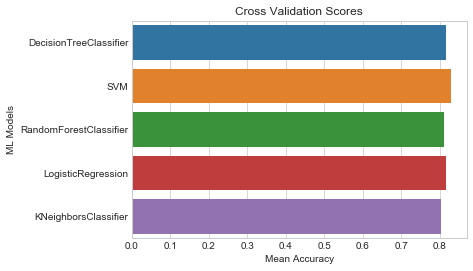

In [187]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [188]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8338983050847457
